In [52]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data, plot_3d_scatter
from gen_data import normalise_data
import seaborn as sns
sns.set(font_scale=1)

In [2]:
# computes the entropy of a tensor
def calc_entropy(x:torch.Tensor):
    '''
    Computes the (Shannon) entropy of a tensor based on its empirical distribution
    '''
    x = x.flatten()
    freq = x.unique(return_counts=True)[1]
    probs = freq/torch.sum(freq)
    return -torch.multiply(probs, torch.log(probs)).sum()

In [12]:
X, Y = load_data('./data/','complex_train_nonoise.pkl')

In [13]:
# Y: 10000 data points, 50 time steps, 16 dimensions
calc_entropy(Y[:,-1,:])

tensor(6.4801, device='cuda:0')

In [42]:
# for each dimension
entropies = np.zeros(16)
for i in range(16):
    entropies[i] = calc_entropy(Y[:,:,i])
entropies

array([-0.        ,  4.12532663, 13.11447144, 13.11631203,  4.32212448,
       13.11263084, 13.11683273,  0.71271759, 13.11714458,  9.69902134,
       -0.        ,  0.58390713,  2.96384931,  6.96979952, 13.11374283,
        4.13789368])

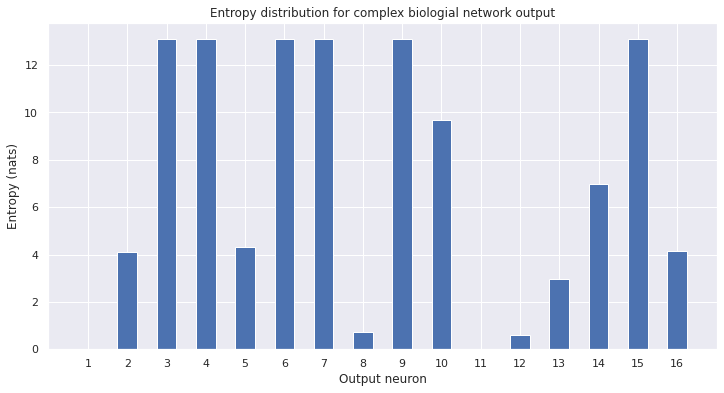

In [53]:
plt.figure(figsize=(12,6))
w = 1
plt.bar(np.arange(16) ,entropies, 0.5*w)
plt.xticks(np.arange(16), [i+1 for i in range(16)])
plt.xlabel('Output neuron')
plt.ylabel('Entropy (nats)')
plt.title('Entropy distribution for complex biologial network output')
plt.savefig('./figures/complex_entropy.png')
plt.show()

In [15]:
# principal component analysis of output

# standardise data
Z_scored_Y = normalise_data(Y.view(-1,16)) # normalise data
Z_scored_Y = Z_scored_Y.cpu().numpy()

cov = np.cov(Z_scored_Y.T)

# eigendecomposition and sort eigenvalues
eigenvals, eigenvecs = np.linalg.eig(cov)

idx = eigenvals.argsort()[::-1]   
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:,idx].T

pca = Z_scored_Y @ eigenvecs[:3].T

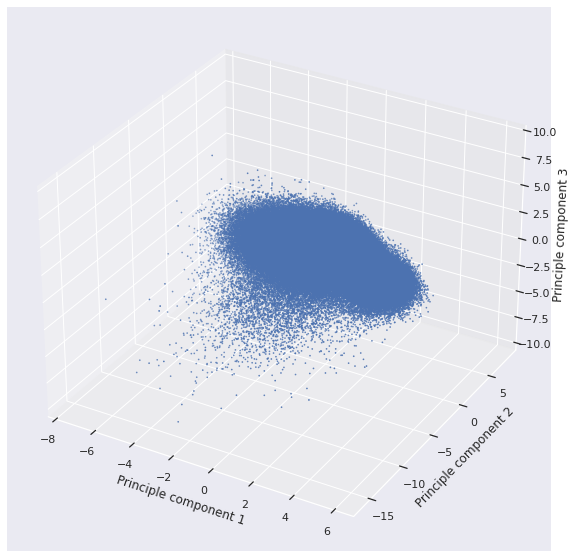

In [58]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca[:,0], pca[:,1], pca[:,2], s=0.5)
ax.set_xlabel('Principle component 1')
ax.set_ylabel('Principle component 2')
ax.set_zlabel('Principle component 3')
plt.savefig('./figures/complex_pca.png')
plt.show()

Text(0, 0.5, 'PC2')

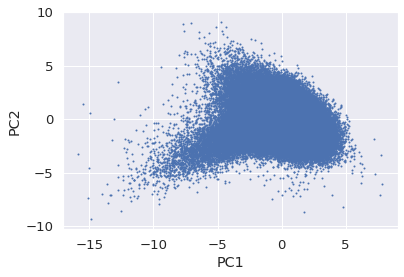

In [17]:
plt.scatter(pca[:,1], pca[:,2], s=1)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [18]:
eigenvals

array([2.34172686, 1.78043683, 1.41312196, 1.0931566 , 1.00262687,
       1.00006582, 0.99996905, 0.95418931, 0.90751246, 0.76834895,
       0.65286719, 0.4568668 , 0.35658771, 0.27252367, 0.        ,
       0.        ])

In [10]:
np.linalg.eig(cov)[1][:,0]

array([ 0.        ,  0.29979298, -0.22274757, -0.38462481, -0.04281069,
        0.05848809, -0.44857391, -0.00089331, -0.15742542, -0.49945319,
        0.        ,  0.00197991, -0.01977181, -0.06829107,  0.47440615,
       -0.04174353])

In [11]:
eigenvals

array([2.34172686, 1.78043683, 1.41312196, 1.0931566 , 1.00262687,
       1.00006582, 0.99996905, 0.95418931, 0.90751246, 0.76834895,
       0.65286719, 0.4568668 , 0.35658771, 0.27252367, 0.        ,
       0.        ])

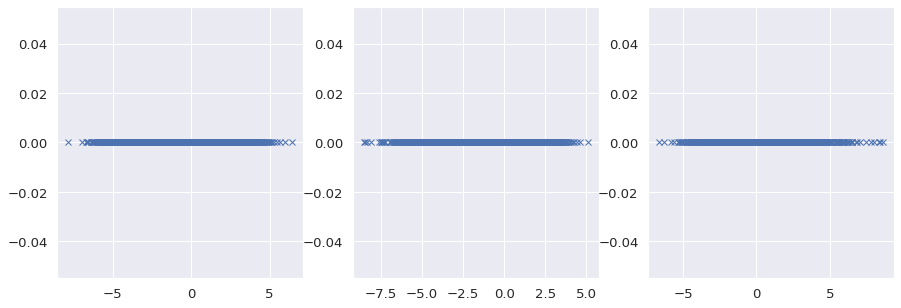

In [13]:
n = len(pca[:,0])
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(pca[:,0], np.zeros(n), 'x')
plt.subplot(132)
plt.plot(pca[:,1], np.zeros(n), 'x')
plt.subplot(133)
plt.plot(pca[:,2], np.zeros(n), 'x')